In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef
from collections import defaultdict
import numpy as np
import utils
import matplotlib.pyplot as plt
import math


In [3]:
path = r"../data_files/ecq_B_1000_all_one_per_iso_1_524287.parquet"
df = utils.load_data(path)

#divide among high and low rank (0&1 low, 2&3 high)
#df['rank'] = df['rank'].apply(lambda x: 0 if x < 2 else 1)


Loaded the big dataset with 1000 a_p's and 2164705 curves..


Import utilities and obtain dictionary of accuracies

In [4]:
# choose your desired bounds (including the end points)
bounds_list = [(i**2-1400, i**2+1400) for i in range(60, 720, 20)]
#bounds_list = [(2**i, 2**(i+1)) for i in range(10, 30)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 10
res_dict={}

# Obtain dictionary of conductor bounds and corresponding number of ap values
for bounds in bounds_list:
    lower_bound, upper_bound = bounds
    bound = int(np.sqrt((upper_bound + lower_bound) / 2))
    #bound = math.log(lower_bound, 2)
    cumulative_dict = defaultdict(lambda: [0, 0])  # [cumulative sum, count]

    for i in range(20):  # Repeat x times
        res_df = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size=step_size, metric = matthews_corrcoef, random_state=143+i)
        temp_dict = utils.find_min_num_a_p_for_performance_thresholds(res_df)
        
        # Update cumulative sums and counts, checking for NaN
        for key, value in temp_dict.items():
            if not np.isnan(value):  # Check if value is not NaN
                cumulative_dict[key][0] += value
                cumulative_dict[key][1] += 1

    # Calculate averages and assign to res_dict, excluding keys with NaN values
    res_dict[bound] = {key: sum_count[0] / sum_count[1] for key, sum_count in cumulative_dict.items() if sum_count[1] > 0}

    print(f"Conductor with exponent {bound} needs the following number of ap values: {res_dict[bound]}")


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2200, 5000]..
There are 10757 curves within the conductor range [2200, 5000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2200, 5000]..
There are 10757 curves within the conductor range [2200, 5000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2200, 5000]..
There are 10757 curves within the conductor range [2200, 5000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 60 needs the following number of ap values: {0.98: 120.0, 0.95: 50.0, 0.9: 40.0, 0.85: 30.0, 0.8: 26.666666666666668, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [5000, 7800]..
There are 11623 curves within the conductor range [5000, 7800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [5000, 7800]..
There are 11623 curves within the conductor range [5000, 7800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [5000, 7800]..
There are 11623 curves within the conductor range [5000, 7800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 80 needs the following number of ap values: {0.95: 90.0, 0.9: 60.0, 0.85: 40.0, 0.8: 30.0, 0.75: 30.0, 0.7: 20.0, 0.65: 20.0, 0.6: 20.0, 0.55: 16.666666666666668, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0, 0.25: 10.0, 0.98: 480.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8600, 11400]..
There are 11890 curves within the conductor range [8600, 11400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8600, 11400]..
There are 11890 curves within the conductor range [8600, 11400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8600, 11400]..
There are 11890 curves within the conductor range [8600, 11400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 100 needs the following number of ap values: {0.95: 120.0, 0.9: 76.66666666666667, 0.85: 60.0, 0.8: 50.0, 0.75: 40.0, 0.7: 30.0, 0.65: 26.666666666666668, 0.6: 20.0, 0.55: 20.0, 0.5: 16.666666666666668, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [13000, 15800]..
There are 12140 curves within the conductor range [13000, 15800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [13000, 15800]..
There are 12140 curves within the conductor range [13000, 15800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [13000, 15800]..
There are 12140 curves within the conductor range [13000, 15800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 120 needs the following number of ap values: {0.95: 203.33333333333334, 0.9: 100.0, 0.85: 76.66666666666667, 0.8: 53.333333333333336, 0.75: 40.0, 0.7: 33.333333333333336, 0.65: 30.0, 0.6: 20.0, 0.55: 20.0, 0.5: 20.0, 0.45: 16.666666666666668, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18200, 21000]..
There are 12357 curves within the conductor range [18200, 21000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18200, 21000]..
There are 12357 curves within the conductor range [18200, 21000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18200, 21000]..
There are 12357 curves within the conductor range [18200, 21000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 140 needs the following number of ap values: {0.9: 140.0, 0.85: 93.33333333333333, 0.8: 76.66666666666667, 0.75: 50.0, 0.7: 36.666666666666664, 0.65: 30.0, 0.6: 23.333333333333332, 0.55: 20.0, 0.5: 20.0, 0.45: 20.0, 0.4: 13.333333333333334, 0.35: 10.0, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [24200, 27000]..
There are 12238 curves within the conductor range [24200, 27000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [24200, 27000]..
There are 12238 curves within the conductor range [24200, 27000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [24200, 27000]..
There are 12238 curves within the conductor range [24200, 27000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 160 needs the following number of ap values: {0.9: 206.66666666666666, 0.85: 133.33333333333334, 0.8: 96.66666666666667, 0.75: 66.66666666666667, 0.7: 50.0, 0.65: 40.0, 0.6: 30.0, 0.55: 20.0, 0.5: 20.0, 0.45: 20.0, 0.4: 20.0, 0.35: 16.666666666666668, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [31000, 33800]..
There are 12434 curves within the conductor range [31000, 33800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [31000, 33800]..
There are 12434 curves within the conductor range [31000, 33800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [31000, 33800]..
There are 12434 curves within the conductor range [31000, 33800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 180 needs the following number of ap values: {0.9: 256.6666666666667, 0.85: 170.0, 0.8: 116.66666666666667, 0.75: 83.33333333333333, 0.7: 60.0, 0.65: 40.0, 0.6: 30.0, 0.55: 20.0, 0.5: 20.0, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 10.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [38600, 41400]..
There are 12757 curves within the conductor range [38600, 41400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [38600, 41400]..
There are 12757 curves within the conductor range [38600, 41400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [38600, 41400]..
There are 12757 curves within the conductor range [38600, 41400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 200 needs the following number of ap values: {0.9: 286.6666666666667, 0.85: 183.33333333333334, 0.8: 126.66666666666667, 0.75: 90.0, 0.7: 60.0, 0.65: 40.0, 0.6: 30.0, 0.55: 26.666666666666668, 0.5: 20.0, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 16.666666666666668, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [47000, 49800]..
There are 12404 curves within the conductor range [47000, 49800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [47000, 49800]..
There are 12404 curves within the conductor range [47000, 49800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [47000, 49800]..
There are 12404 curves within the conductor range [47000, 49800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 220 needs the following number of ap values: {0.9: 353.3333333333333, 0.85: 206.66666666666666, 0.8: 143.33333333333334, 0.75: 86.66666666666667, 0.7: 70.0, 0.65: 46.666666666666664, 0.6: 33.333333333333336, 0.55: 30.0, 0.5: 20.0, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [56200, 59000]..
There are 12392 curves within the conductor range [56200, 59000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [56200, 59000]..
There are 12392 curves within the conductor range [56200, 59000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [56200, 59000]..
There are 12392 curves within the conductor range [56200, 59000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 240 needs the following number of ap values: {0.9: 403.3333333333333, 0.85: 230.0, 0.8: 153.33333333333334, 0.75: 110.0, 0.7: 73.33333333333333, 0.65: 50.0, 0.6: 40.0, 0.55: 30.0, 0.5: 26.666666666666668, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [66200, 69000]..
There are 12398 curves within the conductor range [66200, 69000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [66200, 69000]..
There are 12398 curves within the conductor range [66200, 69000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [66200, 69000]..
There are 12398 curves within the conductor range [66200, 69000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 260 needs the following number of ap values: {0.9: 540.0, 0.85: 270.0, 0.8: 193.33333333333334, 0.75: 130.0, 0.7: 83.33333333333333, 0.65: 60.0, 0.6: 43.333333333333336, 0.55: 30.0, 0.5: 30.0, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [77000, 79800]..
There are 12361 curves within the conductor range [77000, 79800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [77000, 79800]..
There are 12361 curves within the conductor range [77000, 79800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [77000, 79800]..
There are 12361 curves within the conductor range [77000, 79800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 280 needs the following number of ap values: {0.9: 665.0, 0.85: 346.6666666666667, 0.8: 220.0, 0.75: 130.0, 0.7: 96.66666666666667, 0.65: 63.333333333333336, 0.6: 40.0, 0.55: 30.0, 0.5: 30.0, 0.45: 20.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 16.666666666666668}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [88600, 91400]..
There are 12713 curves within the conductor range [88600, 91400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [88600, 91400]..
There are 12713 curves within the conductor range [88600, 91400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [88600, 91400]..
There are 12713 curves within the conductor range [88600, 91400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 300 needs the following number of ap values: {0.85: 340.0, 0.8: 213.33333333333334, 0.75: 140.0, 0.7: 93.33333333333333, 0.65: 66.66666666666667, 0.6: 46.666666666666664, 0.55: 30.0, 0.5: 30.0, 0.45: 26.666666666666668, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [101000, 103800]..
There are 12235 curves within the conductor range [101000, 103800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [101000, 103800]..
There are 12235 curves within the conductor range [101000, 103800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [101000, 103800]..
There are 12235 curves within the conductor range [101000, 103800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 320 needs the following number of ap values: {0.85: 493.3333333333333, 0.8: 283.3333333333333, 0.75: 193.33333333333334, 0.7: 126.66666666666667, 0.65: 80.0, 0.6: 50.0, 0.55: 40.0, 0.5: 30.0, 0.45: 30.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [114200, 117000]..
There are 12480 curves within the conductor range [114200, 117000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [114200, 117000]..
There are 12480 curves within the conductor range [114200, 117000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [114200, 117000]..
There are 12480 curves within the conductor range [114200, 117000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 340 needs the following number of ap values: {0.85: 553.3333333333334, 0.8: 326.6666666666667, 0.75: 173.33333333333334, 0.7: 113.33333333333333, 0.65: 73.33333333333333, 0.6: 50.0, 0.55: 40.0, 0.5: 30.0, 0.45: 30.0, 0.4: 20.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [128200, 131000]..
There are 12136 curves within the conductor range [128200, 131000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [128200, 131000]..
There are 12136 curves within the conductor range [128200, 131000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [128200, 131000]..
There are 12136 curves within the conductor range [128200, 131000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 360 needs the following number of ap values: {0.85: 645.0, 0.8: 360.0, 0.75: 240.0, 0.7: 146.66666666666666, 0.65: 83.33333333333333, 0.6: 60.0, 0.55: 40.0, 0.5: 30.0, 0.45: 30.0, 0.4: 23.333333333333332, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [143000, 145800]..
There are 12898 curves within the conductor range [143000, 145800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [143000, 145800]..
There are 12898 curves within the conductor range [143000, 145800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [143000, 145800]..
There are 12898 curves within the conductor range [143000, 145800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 380 needs the following number of ap values: {0.85: 663.3333333333334, 0.8: 396.6666666666667, 0.75: 266.6666666666667, 0.7: 160.0, 0.65: 93.33333333333333, 0.6: 60.0, 0.55: 40.0, 0.5: 33.333333333333336, 0.45: 30.0, 0.4: 30.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [158600, 161400]..
There are 12281 curves within the conductor range [158600, 161400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [158600, 161400]..
There are 12281 curves within the conductor range [158600, 161400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [158600, 161400]..
There are 12281 curves within the conductor range [158600, 161400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 400 needs the following number of ap values: {0.8: 430.0, 0.75: 293.3333333333333, 0.7: 150.0, 0.65: 100.0, 0.6: 73.33333333333333, 0.55: 43.333333333333336, 0.5: 40.0, 0.45: 30.0, 0.4: 30.0, 0.35: 23.333333333333332, 0.3: 20.0, 0.25: 20.0, 0.85: 670.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [175000, 177800]..
There are 12398 curves within the conductor range [175000, 177800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [175000, 177800]..
There are 12398 curves within the conductor range [175000, 177800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [175000, 177800]..
There are 12398 curves within the conductor range [175000, 177800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 420 needs the following number of ap values: {0.8: 503.3333333333333, 0.75: 273.3333333333333, 0.7: 166.66666666666666, 0.65: 96.66666666666667, 0.6: 66.66666666666667, 0.55: 46.666666666666664, 0.5: 36.666666666666664, 0.45: 30.0, 0.4: 30.0, 0.35: 23.333333333333332, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [192200, 195000]..
There are 12428 curves within the conductor range [192200, 195000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [192200, 195000]..
There are 12428 curves within the conductor range [192200, 195000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [192200, 195000]..
There are 12428 curves within the conductor range [192200, 195000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 440 needs the following number of ap values: {0.8: 543.3333333333334, 0.75: 350.0, 0.7: 180.0, 0.65: 103.33333333333333, 0.6: 70.0, 0.55: 46.666666666666664, 0.5: 40.0, 0.45: 30.0, 0.4: 30.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [210200, 213000]..
There are 12480 curves within the conductor range [210200, 213000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [210200, 213000]..
There are 12480 curves within the conductor range [210200, 213000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [210200, 213000]..
There are 12480 curves within the conductor range [210200, 213000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 460 needs the following number of ap values: {0.8: 576.6666666666666, 0.75: 320.0, 0.7: 203.33333333333334, 0.65: 126.66666666666667, 0.6: 73.33333333333333, 0.55: 50.0, 0.5: 40.0, 0.45: 30.0, 0.4: 30.0, 0.35: 20.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [229000, 231800]..
There are 11896 curves within the conductor range [229000, 231800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [229000, 231800]..
There are 11896 curves within the conductor range [229000, 231800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [229000, 231800]..
There are 11896 curves within the conductor range [229000, 231800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 480 needs the following number of ap values: {0.8: 776.6666666666666, 0.75: 366.6666666666667, 0.7: 213.33333333333334, 0.65: 120.0, 0.6: 80.0, 0.55: 50.0, 0.5: 40.0, 0.45: 36.666666666666664, 0.4: 30.0, 0.35: 30.0, 0.3: 20.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [248600, 251400]..
There are 12259 curves within the conductor range [248600, 251400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [248600, 251400]..
There are 12259 curves within the conductor range [248600, 251400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [248600, 251400]..
There are 12259 curves within the conductor range [248600, 251400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 500 needs the following number of ap values: {0.8: 796.6666666666666, 0.75: 453.3333333333333, 0.7: 240.0, 0.65: 116.66666666666667, 0.6: 80.0, 0.55: 53.333333333333336, 0.5: 43.333333333333336, 0.45: 40.0, 0.4: 30.0, 0.35: 30.0, 0.3: 23.333333333333332, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [269000, 271800]..
There are 12126 curves within the conductor range [269000, 271800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [269000, 271800]..
There are 12126 curves within the conductor range [269000, 271800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [269000, 271800]..
There are 12126 curves within the conductor range [269000, 271800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 520 needs the following number of ap values: {0.75: 476.6666666666667, 0.7: 266.6666666666667, 0.65: 136.66666666666666, 0.6: 76.66666666666667, 0.55: 60.0, 0.5: 46.666666666666664, 0.45: 40.0, 0.4: 30.0, 0.35: 30.0, 0.3: 23.333333333333332, 0.25: 20.0, 0.8: 900.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [290200, 293000]..
There are 12565 curves within the conductor range [290200, 293000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [290200, 293000]..
There are 12565 curves within the conductor range [290200, 293000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [290200, 293000]..
There are 12565 curves within the conductor range [290200, 293000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 540 needs the following number of ap values: {0.75: 746.6666666666666, 0.7: 343.3333333333333, 0.65: 183.33333333333334, 0.6: 110.0, 0.55: 60.0, 0.5: 46.666666666666664, 0.45: 40.0, 0.4: 33.333333333333336, 0.35: 30.0, 0.3: 23.333333333333332, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [312200, 315000]..
There are 12283 curves within the conductor range [312200, 315000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [312200, 315000]..
There are 12283 curves within the conductor range [312200, 315000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [312200, 315000]..
There are 12283 curves within the conductor range [312200, 315000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 560 needs the following number of ap values: {0.75: 656.6666666666666, 0.7: 306.6666666666667, 0.65: 160.0, 0.6: 103.33333333333333, 0.55: 60.0, 0.5: 50.0, 0.45: 40.0, 0.4: 33.333333333333336, 0.35: 30.0, 0.3: 30.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [335000, 337800]..
There are 12128 curves within the conductor range [335000, 337800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [335000, 337800]..
There are 12128 curves within the conductor range [335000, 337800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [335000, 337800]..
There are 12128 curves within the conductor range [335000, 337800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 580 needs the following number of ap values: {0.75: 796.6666666666666, 0.7: 416.6666666666667, 0.65: 213.33333333333334, 0.6: 120.0, 0.55: 70.0, 0.5: 50.0, 0.45: 43.333333333333336, 0.4: 36.666666666666664, 0.35: 30.0, 0.3: 30.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [358600, 361400]..
There are 12079 curves within the conductor range [358600, 361400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [358600, 361400]..
There are 12079 curves within the conductor range [358600, 361400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [358600, 361400]..
There are 12079 curves within the conductor range [358600, 361400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 600 needs the following number of ap values: {0.75: 640.0, 0.7: 336.6666666666667, 0.65: 203.33333333333334, 0.6: 110.0, 0.55: 66.66666666666667, 0.5: 50.0, 0.45: 40.0, 0.4: 40.0, 0.35: 30.0, 0.3: 30.0, 0.25: 23.333333333333332}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [383000, 385800]..
There are 12150 curves within the conductor range [383000, 385800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [383000, 385800]..
There are 12150 curves within the conductor range [383000, 385800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [383000, 385800]..
There are 12150 curves within the conductor range [383000, 385800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 620 needs the following number of ap values: {0.75: 845.0, 0.7: 416.6666666666667, 0.65: 196.66666666666666, 0.6: 96.66666666666667, 0.55: 66.66666666666667, 0.5: 50.0, 0.45: 46.666666666666664, 0.4: 40.0, 0.35: 30.0, 0.3: 30.0, 0.25: 23.333333333333332}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [408200, 411000]..
There are 11595 curves within the conductor range [408200, 411000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [408200, 411000]..
There are 11595 curves within the conductor range [408200, 411000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [408200, 411000]..
There are 11595 curves within the conductor range [408200, 411000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 640 needs the following number of ap values: {0.75: 885.0, 0.7: 416.6666666666667, 0.65: 180.0, 0.6: 100.0, 0.55: 66.66666666666667, 0.5: 53.333333333333336, 0.45: 43.333333333333336, 0.4: 33.333333333333336, 0.35: 30.0, 0.3: 30.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [434200, 437000]..
There are 12194 curves within the conductor range [434200, 437000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [434200, 437000]..
There are 12194 curves within the conductor range [434200, 437000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [434200, 437000]..
There are 12194 curves within the conductor range [434200, 437000].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 660 needs the following number of ap values: {0.7: 426.6666666666667, 0.65: 186.66666666666666, 0.6: 113.33333333333333, 0.55: 70.0, 0.5: 53.333333333333336, 0.45: 43.333333333333336, 0.4: 40.0, 0.35: 30.0, 0.3: 30.0, 0.25: 20.0, 0.75: 880.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [461000, 463800]..
There are 11830 curves within the conductor range [461000, 463800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [461000, 463800]..
There are 11830 curves within the conductor range [461000, 463800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [461000, 463800]..
There are 11830 curves within the conductor range [461000, 463800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 680 needs the following number of ap values: {0.7: 610.0, 0.65: 200.0, 0.6: 106.66666666666667, 0.55: 70.0, 0.5: 50.0, 0.45: 50.0, 0.4: 40.0, 0.35: 30.0, 0.3: 30.0, 0.25: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [488600, 491400]..
There are 11549 curves within the conductor range [488600, 491400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [488600, 491400]..
There are 11549 curves within the conductor range [488600, 491400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [488600, 491400]..
There are 11549 curves within the conductor range [488600, 491400].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


Conductor with exponent 700 needs the following number of ap values: {0.7: 650.0, 0.65: 320.0, 0.6: 150.0, 0.55: 83.33333333333333, 0.5: 66.66666666666667, 0.45: 53.333333333333336, 0.4: 40.0, 0.35: 36.666666666666664, 0.3: 30.0, 0.25: 30.0}


Restructure the dictionary

In [7]:
# Initialize an empty dictionary to store the result
restructured_dict = {0.99: [], 0.98: [], 0.95: [], 0.9: [], 0.85: [], 0.8: [], 0.75: [], 0.7: [], 
                     0.65:[], 0.6: [], 0.55: [], 0.5: [], 0.45: [], 0.4: [], 0.35: [], 0.3: []}


# Iterate through the original dictionary
for k, subdict in res_dict.items():
    # Iterate through each accuracy level in the restructured dictionary
    for accuracy in restructured_dict:
        # Check if the accuracy level exists in the subdictionary
        if accuracy in subdict:
            # Append the (k, v) pair to the corresponding list in the restructured dictionary
            restructured_dict[accuracy].append((k, subdict[accuracy]))



In [8]:
# Function to process each list of pairs
def process_pairs(pairs):
    # Group by Y-value
    grouped_by_y = defaultdict(list)
    for x, y in pairs:
        grouped_by_y[y].append(x)
    
    # Calculate average X for each Y and create new pairs
    new_pairs = [(sum(xs) / len(xs), y) for y, xs in grouped_by_y.items()]
    
    return new_pairs

# Process each key in the dictionary
restructured_dict1 = {key: process_pairs(value) for key, value in restructured_dict.items()}

print(restructured_dict1)

{0.99: [], 0.98: [(60.0, 120.0), (80.0, 480.0)], 0.95: [(60.0, 50.0), (80.0, 90.0), (100.0, 120.0), (120.0, 203.33333333333334)], 0.9: [(60.0, 40.0), (80.0, 60.0), (100.0, 76.66666666666667), (120.0, 100.0), (140.0, 140.0), (160.0, 206.66666666666666), (180.0, 256.6666666666667), (200.0, 286.6666666666667), (220.0, 353.3333333333333), (240.0, 403.3333333333333), (260.0, 540.0), (280.0, 665.0)], 0.85: [(60.0, 30.0), (80.0, 40.0), (100.0, 60.0), (120.0, 76.66666666666667), (140.0, 93.33333333333333), (160.0, 133.33333333333334), (180.0, 170.0), (200.0, 183.33333333333334), (220.0, 206.66666666666666), (240.0, 230.0), (260.0, 270.0), (280.0, 346.6666666666667), (300.0, 340.0), (320.0, 493.3333333333333), (340.0, 553.3333333333334), (360.0, 645.0), (380.0, 663.3333333333334), (400.0, 670.0)], 0.8: [(60.0, 26.666666666666668), (80.0, 30.0), (100.0, 50.0), (120.0, 53.333333333333336), (140.0, 76.66666666666667), (160.0, 96.66666666666667), (180.0, 116.66666666666667), (200.0, 126.66666666666

For each accuracy threshold, plot points (square root of conductor, required number of ap's) in a different color, then fit a line for each separate threshold.

<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_15318/3289405367.py:37: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{N}$, where $N=Conductor$')


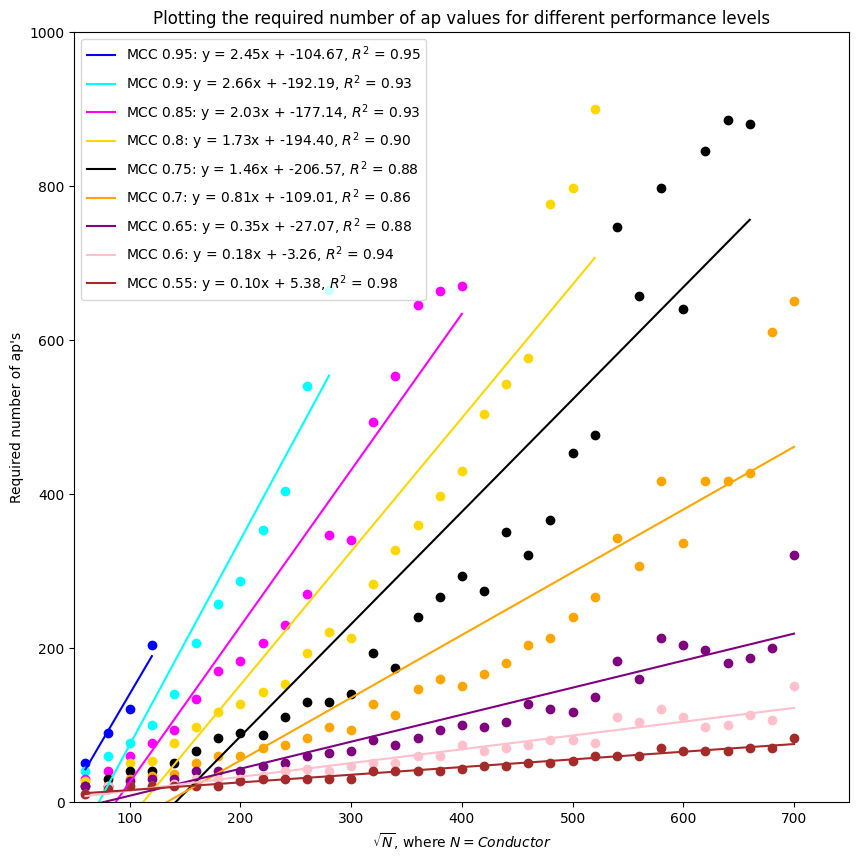

In [9]:
# Define colors for each subdictionary
colors = {0.99:'red', 0.98: 'green', 0.95: 'blue', 0.9: 'cyan', 0.85: 'magenta', 0.8: 'gold', 0.75: 'black', 0.7: 'orange',
          0.65: 'purple', 0.6: 'pink', 0.55: 'brown', 0.5: 'gray', 0.45: 'olive', 0.4: 'lime', 0.35: 'teal', 0.3: 'navy'}

plt.figure(figsize=(10, 10))

for accuracy, pairs in restructured_dict.items():
    if accuracy>0.5 and accuracy<0.98:
    # Remove pairs with 'nan' values
        cleaned_pairs = [(x, y) for x, y in pairs if y > 0]
        if cleaned_pairs:
            x_vals, y_vals = zip(*cleaned_pairs)
            #y_vals = [math.log(y, 2) for y in y_vals]
            # Convert to numpy arrays for linear regression
            x_np = np.array(x_vals, dtype=np.float64)
            y_np = np.array(y_vals, dtype=np.float64)
            # Calculate the coefficients of the line of best fit
            m, b = np.polyfit(x_np, y_np, 1)
            # Calculate predictions
            y_pred = m * x_np + b

            # Calculate R^2
            ss_res = np.sum((y_np - y_pred) ** 2)
            ss_tot = np.sum((y_np - np.mean(y_np)) ** 2)
            r_squared = 1 - (ss_res / ss_tot)

            # Plot the cleaned scatter plot
            plt.scatter(x_vals, y_vals, color=colors[accuracy])
            # Plot the line of best fit
            plt.plot(x_np, y_pred, color=colors[accuracy], label=f'MCC {accuracy}: y = {m:.2f}x + {b:.2f}, $R^2$ = {r_squared:.2f}')

# Set the limits of the x and y axes
plt.xlim(50, 750)
plt.ylim(0, 1000)

# Add labels and legend
plt.xlabel('$\sqrt{N}$, where $N=Conductor$')
plt.ylabel("Required number of ap's")
plt.title('Plotting the required number of ap values for different performance levels')
plt.legend()

# Show the plot
plt.show()

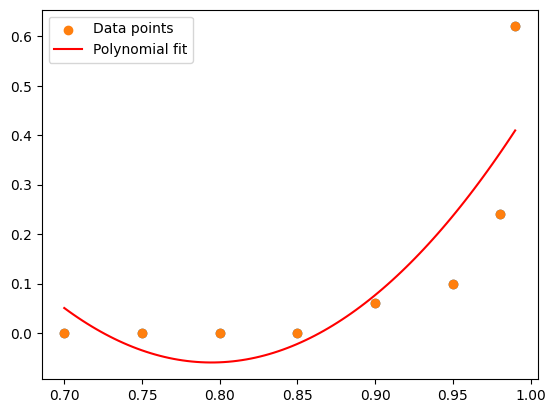

In [11]:
accs=np.array([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99])
slopes = np.array([0, 0, 0, 0, 0.06, 0.1, 0.24, 0.62])
plt.scatter(accs, slopes)
a, b, c= np.polyfit(accs, slopes, 2)
# Create a polynomial function from the coefficients
p = np.poly1d([a, b, c])

# Generate a range of x-values for plotting the polynomial
x_range = np.linspace(accs.min(), accs.max(), 100)

# Calculate the corresponding y-values using the polynomial function
y_poly = p(x_range)

# Plotting
plt.scatter(accs, slopes, label='Data points')
plt.plot(x_range, y_poly, color='red', label='Polynomial fit')
plt.legend()
plt.show()


In [12]:
p(1)

np.float64(0.4589620136175325)

In [21]:
import json

# Specify the file name
file_name = 'mcc_arith_cond_v1.json'

# Write the dictionary to a JSON file
with open(file_name, 'w') as json_file:
    json.dump(res_dict, json_file, indent=4)  # indent=4 is optional, it just makes the file more readable
